In [5]:
import os
# import pandas as pd
import numpy as np
import cv2

import joblib
from joblib import dump

import sys
sys.path.append("..")
# import utils.classifier_utils as clf
from utils.imutils import jimshow as show
# from utils.imutils import jimshow_channel as show_channel

# Machine learning stuff
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

from tensorflow.keras.datasets import cifar10

# plotting tool
import matplotlib.pyplot as plt

/home/ucloud/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


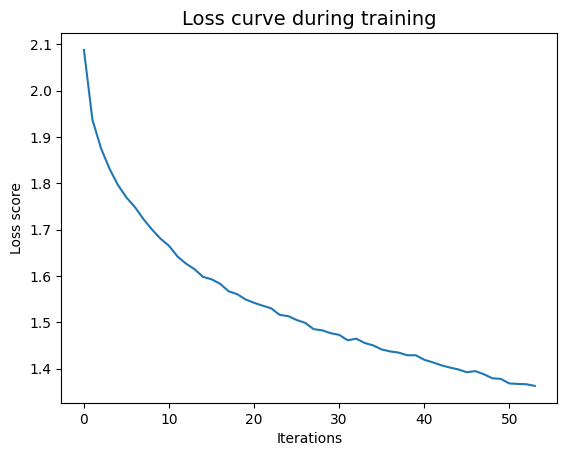

<Figure size 640x480 with 0 Axes>

In [6]:
# This function loads the data from the cifar10 dataset
def load_data():
    return cifar10.load_data()

# This function preprocesses the images
def preprocess_images(images):
    image_list = []  # Empty list which stores the flattened images
    
    for image in images:
        image_grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # Converts the images into greyscale
        image_scaled = image_grey / 255.0 # Scales the images
        image_flattened = image_scaled.flatten()  # Flattens the images
        image_list.append(image_flattened)  # Appends the flattened images to the image_list
    images_processed = np.array(image_list) # Converts the list of flattened images to a np array
    return images_processed

# This function trains the logistic regression model
def train_model(X_train_processed, y_train_processed):
        return MLPClassifier(activation = "relu", # maybe change this to ReLU?
                            hidden_layer_sizes = (256,), # make bigger hidden layer
                            max_iter=1000,
                            random_state = 42).fit(X_train_processed, y_train_processed)

# This function evaluates the performance of the trained classifier on the test dataset and produces a classification report
def evaluate_model(y_test_processed, X_test_processed, classifier, labels):
    return metrics.classification_report(y_test_processed, classifier.predict(X_test_processed), target_names=labels)
    
def plot_loss_curve(classifier, plot_path):
    plt.plot(classifier.loss_curve_)
    plt.title("Loss curve during training", fontsize=14)
    plt.xlabel('Iterations')
    plt.ylabel('Loss score')
    plt.show()
    plt.savefig(plot_path)
    

# This function saves the classification report and the logistic regression classifier model
def saving_report(classifier_metrics, classifier, report_path, model_path):

    # Opens the file in the out folder in write mode and writes the classification metrics to it.
    with open(report_path, "w") as file:
        file.write(classifier_metrics)
    
    # Saves the trained classifier in the models folder
    joblib.dump(classifier, model_path)

def main():
    # Creates a filepath for each directory 
    out_folder_path = os.path.join("..", "out", "neural_network")
    models_folder_path = os.path.join("..","models", "neural_network")

    # If the directory does not exist, make the directory
    os.makedirs(out_folder_path, exist_ok=True)
    os.makedirs(models_folder_path, exist_ok=True)

    # Filepath for each saved file
    model_path = os.path.join("..", "models", "neural_network", "neural_network_classifier.joblib")
    report_path = os.path.join("..","out", "neural_network", "classification_report.txt")
    plot_path = os.path.join("..","out", "neural_network", "loss_curve.png")
  
    # Loading the data
    (X_train, y_train), (X_test, y_test) = load_data()

    # List of labels
    labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

    # Preprocessing the training and test images
    X_train_processed = preprocess_images(X_train)
    X_test_processed = preprocess_images(X_test)
    y_train_processed = y_train.flatten()
    y_test_processed = y_test.flatten()

    #Training the neural network 
    classifier = train_model(X_train_processed, y_train_processed)

    # Creating the classification report
    classifier_metrics = evaluate_model(y_test_processed, X_test_processed, classifier, labels)

    # Plotting the loss curve and saving it 
    plot_loss_curve(classifier, plot_path)

    # Saving the classification report and the neural network model
    saving_report(classifier_metrics, classifier, report_path, model_path)

if __name__ == "__main__":
    main()